# Explore the optimal overscan to use with DESI

In [1]:
%matplotlib notebook

In [2]:
# imports
import numpy as np
import os
from matplotlib import pyplot as plt

from astropy.io import fits

# Init

In [3]:
exp_path = '/home/xavier/DESI/Commissioning/exposures'

In [7]:
exp_id = [16322, 16312, 16305, 16283, 16298]
night = '20190619'
camera = 'z2'

## Methods

In [4]:
def get_raw_counts(hdu, amp='A'):
    img = hdu.data
    if amp == 'A':
        cut = np.median(img[2035:2060, 110:1930], axis=0)
    elif amp == 'C':
        cut = np.median(img[2130:2155, 110:1930], axis=0)
    # Return
    return cut

In [5]:
def get_oscan_row(hdu, amp='A'):
    img = hdu.data
    if amp == 'A':
        bias_row = np.median(img[2067:2092, 110:1930], axis=0)
    elif amp == 'C':
        bias_row = np.median(img[2100:2125, 110:1930], axis=0)
    # Return
    return bias_row

In [11]:
def get_oscan_col(hdu, amp='A'):
    img = hdu.data
    if amp == 'A':
        bias_col = np.median(img[2025:2060, 2065:2090])
    elif amp == 'C':
        bias_col = np.median(img[2130:2155, 2065:2090])
    # Return
    return bias_col

In [6]:
def fit_line(x, y):
    p = np.polyfit(x,y,1)
    return p

# z2, A vs. C with spatial

## Grab the counts

In [12]:
raw_counts_A = []
bias_row_A = []
raw_counts_C = []
bias_row_C = []
bias_col_A, bias_col_C = [], []
exptimes = []
for iid in exp_id:
    ifile = os.path.join(exp_path, night, '000{}'.format(iid), 'desi-000{}.fits.fz'.format(iid))
    hdulist = fits.open(ifile)
    hdu = hdulist[camera]
    exptimes.append(hdu.header['EXPTIME'])
    # A
    cutA = get_raw_counts(hdu, amp='A')
    biasA = get_oscan_row(hdu, amp='A')
    # Just take the end
    raw_counts_A.append(cutA)
    bias_row_A.append(biasA)
    # C
    cutC = get_raw_counts(hdu, amp='C')
    biasC = get_oscan_row(hdu, amp='C')
    # Just take the end
    raw_counts_C.append(cutC)
    bias_row_C.append(biasC)
    # Bias cols
    bias_col_A.append(get_oscan_col(hdu, amp='A'))
    bias_col_C.append(get_oscan_col(hdu, amp='C'))

## Plot me

### overscan_col

<IPython.core.display.Javascript object>


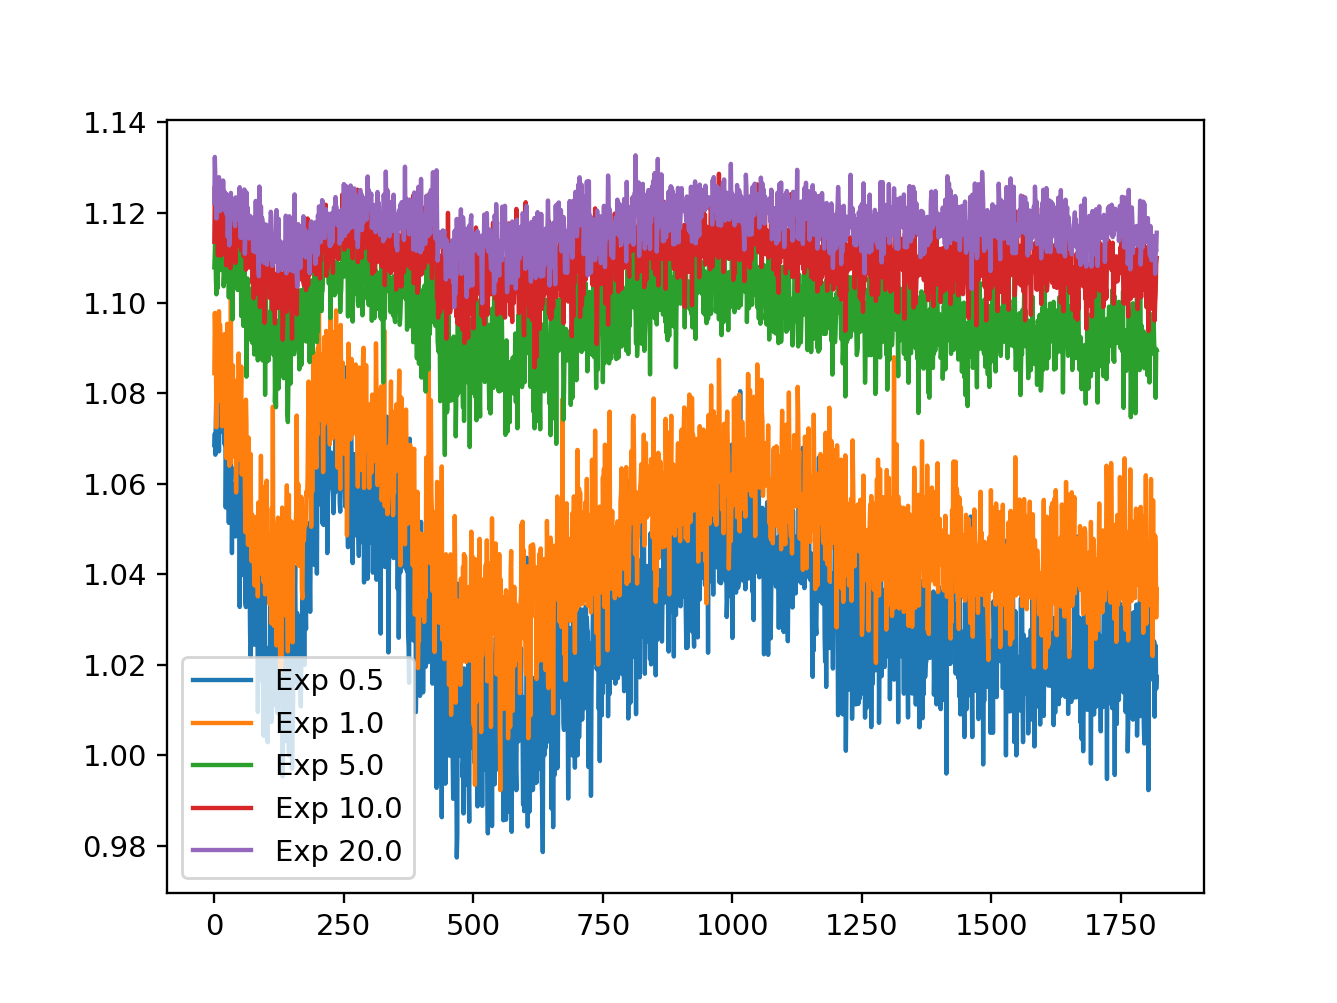

In [13]:
plt.clf()
ax = plt.gca()
for exptime, rawA, biasA, rawC, biasC in zip(exptimes, raw_counts_A, bias_col_A, raw_counts_C, bias_col_C):
    # Calculate
    ratio = (rawA-biasA) / (rawC-biasC)
    #ratio = (rawA-2006.) / (rawC-2007.)
    ax.plot(ratio, label='Exp {:0.1f}'.format(exptime))
#
ax.legend()
plt.show()

### overscan row

<IPython.core.display.Javascript object>


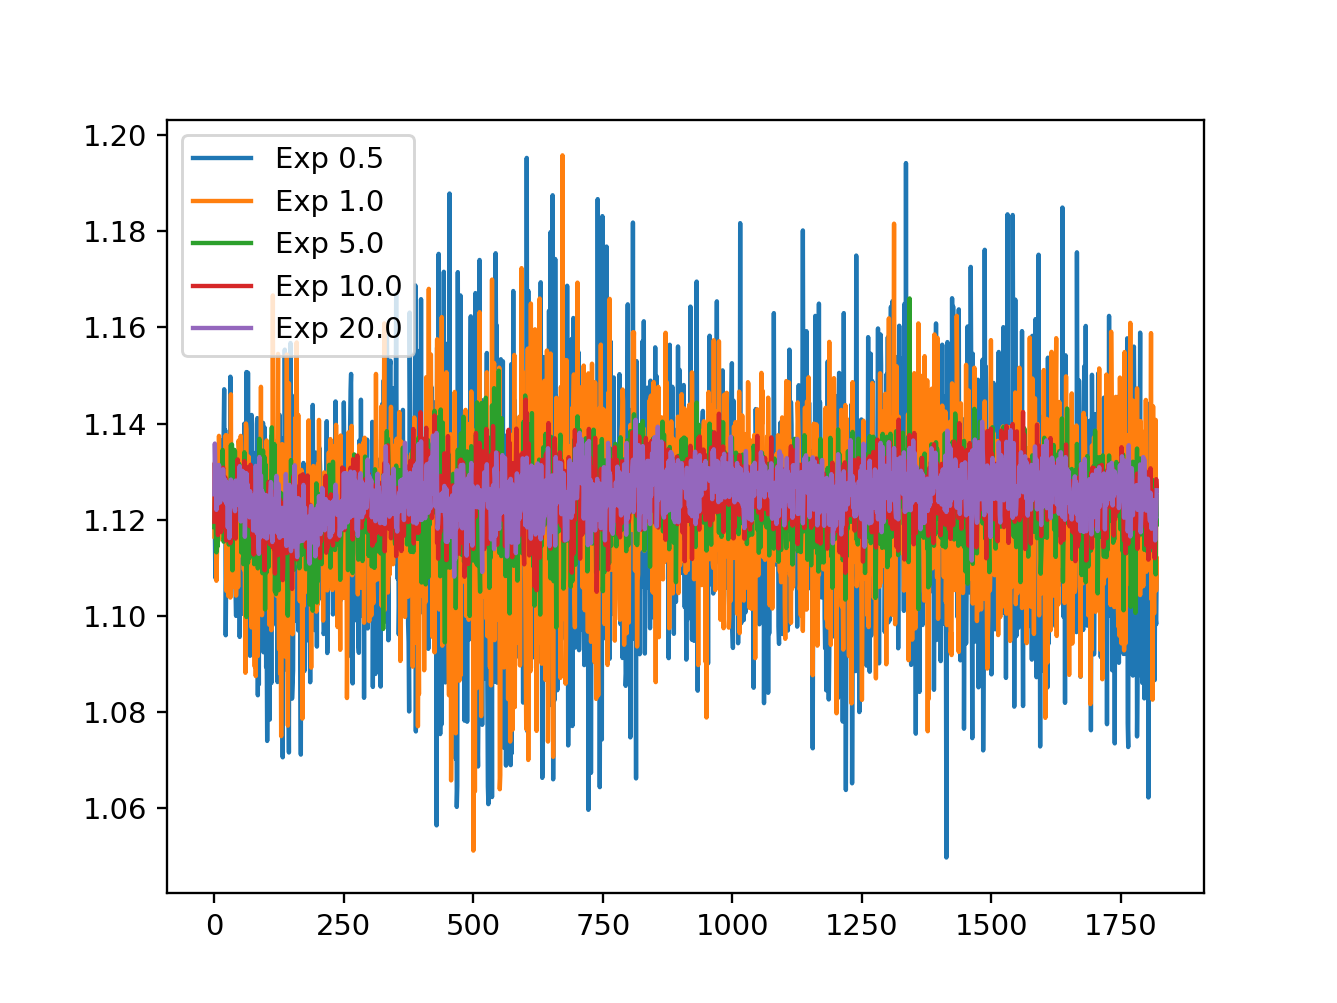

In [14]:
plt.clf()
ax = plt.gca()
for exptime, rawA, biasA, rawC, biasC in zip(exptimes, raw_counts_A, bias_row_A, raw_counts_C, bias_row_C):
    # Calculate
    ratio = (rawA-biasA) / (rawC-biasC)
    ax.plot(ratio, label='Exp {:0.1f}'.format(exptime))
#
ax.legend()
plt.show()